In [14]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import pysal
import esda

import pandas as pd
import pandas_profiling
import geopandas as gpd
import libpysal as lps
import numpy as np
from sklearn import cluster


import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline


In [15]:
Ede = np.loadtxt(r'H:\ITC\GFM\5 - Spatio-temporal Analytics & Modelling\Group Project\training_data.csv',delimiter = ',', skiprows = 1, usecols=range(2, 10))
print(Ede.shape)
print(Ede)

(94, 8)
[[ 3.30000e+01  8.74500e+01  4.01000e+01  8.75500e+01  2.13000e+00
   7.80000e-01  1.00000e-01  5.36000e-02]
 [ 2.34300e+01  8.50400e+01  3.59300e+01  9.02100e+01  4.57000e+00
   3.90000e-01  5.00000e-02  3.75060e+00]
 [ 2.55500e+01  1.19060e+02  2.55500e+01  7.98100e+01  1.21000e+01
   1.15000e+00  1.40000e-01  8.15850e+00]
 [ 5.50000e+01  1.96730e+02 -1.00000e-01  6.28700e+01  2.77000e+01
   1.06000e+00  1.30000e-01  2.25548e+01]
 [ 8.51900e+01  1.86840e+02  3.65500e+01  7.56800e+01  2.53900e+01
   2.96000e+00  3.60000e-01  2.97249e+01]
 [ 1.30100e+02  2.20570e+02  2.34300e+01  8.11300e+01  2.87000e+01
   2.14000e+00  2.60000e-01  2.78275e+01]
 [ 1.19230e+02  2.13710e+02  5.86500e+01  8.18400e+01  2.78700e+01
   1.72000e+00  2.10000e-01  2.07506e+01]
 [ 1.14350e+02  2.18100e+02  1.90300e+01  8.00300e+01  2.63200e+01
   2.06000e+00  2.50000e-01  1.81026e+01]
 [ 8.57300e+01  1.76000e+02  2.45300e+01  8.67700e+01  1.48300e+01
   1.52000e+00  1.80000e-01  1.49371e+01]
 [ 5.33900e

In [16]:
tick_count = Ede[:,-1]
print(tick_count)

[ 5.36000e-02  3.75060e+00  8.15850e+00  2.25548e+01  2.97249e+01
  2.78275e+01  2.07506e+01  1.81026e+01  1.49371e+01  1.43846e+01
  6.54550e+00  1.46850e+00 -3.84600e-01  6.03700e-01  2.47320e+00
  9.13290e+00  2.03543e+01  2.86294e+01  2.87203e+01  2.05058e+01
  1.07086e+01  5.28900e+00  2.23310e+00  1.11890e+00 -1.87650e+00
 -1.55010e+00  3.10960e+00  3.03543e+01  5.99790e+01  7.18881e+01
  5.41026e+01  5.90910e+00  4.76920e+00  2.41030e+00  2.22380e+00
 -1.42190e+00 -3.40330e+00  6.29370e+00  2.34522e+01  3.07552e+01
  3.21189e+01  2.55594e+01  1.90979e+01  1.63916e+01  7.40090e+00
 -1.09560e+00  2.21400e-01 -1.27040e+00 -4.42900e-01  4.72030e+00
  7.26810e+00  1.07273e+01  1.41002e+01  1.77086e+01  2.00117e+01
  1.68485e+01  7.77160e+00  3.05590e+00  5.71100e-01 -1.53850e+00
  2.91400e-01  5.83450e+00  1.29767e+01  1.70979e+01  1.72424e+01
  1.43986e+01  1.42075e+01  1.10233e+01  7.12590e+00  2.23540e+00
  1.63200e-01  8.16000e-02 -1.72490e+00 -3.42660e+00  1.36014e+01
  4.04033e

<function matplotlib.pyplot.show(*args, **kw)>

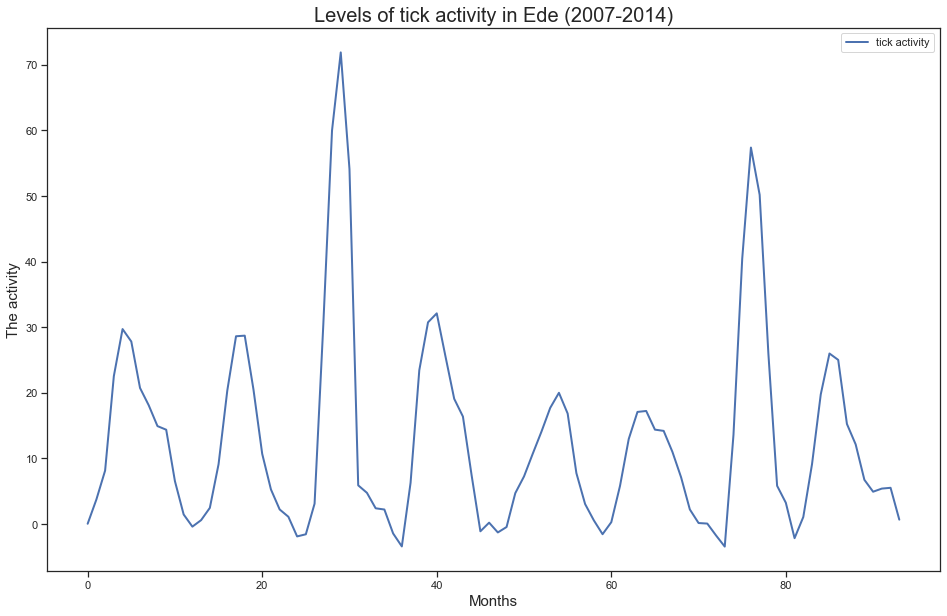

In [28]:
xlinspace = np.linspace(0, len(tick_count)-1, len(tick_count))
f, ax = plt.subplots(1, figsize=(16,10))
plt.plot(xlinspace, tick_count, "b-", label="tick activity", linewidth=2)


plt.title('Levels of tick activity in Ede (2007-2014)', fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('The activity',fontsize=15)
plt.legend()
plt.show

In [18]:
weather_variables = Ede[:,0:7]
print(weather_variables)

[[ 3.3000e+01  8.7450e+01  4.0100e+01  8.7550e+01  2.1300e+00  7.8000e-01
   1.0000e-01]
 [ 2.3430e+01  8.5040e+01  3.5930e+01  9.0210e+01  4.5700e+00  3.9000e-01
   5.0000e-02]
 [ 2.5550e+01  1.1906e+02  2.5550e+01  7.9810e+01  1.2100e+01  1.1500e+00
   1.4000e-01]
 [ 5.5000e+01  1.9673e+02 -1.0000e-01  6.2870e+01  2.7700e+01  1.0600e+00
   1.3000e-01]
 [ 8.5190e+01  1.8684e+02  3.6550e+01  7.5680e+01  2.5390e+01  2.9600e+00
   3.6000e-01]
 [ 1.3010e+02  2.2057e+02  2.3430e+01  8.1130e+01  2.8700e+01  2.1400e+00
   2.6000e-01]
 [ 1.1923e+02  2.1371e+02  5.8650e+01  8.1840e+01  2.7870e+01  1.7200e+00
   2.1000e-01]
 [ 1.1435e+02  2.1810e+02  1.9030e+01  8.0030e+01  2.6320e+01  2.0600e+00
   2.5000e-01]
 [ 8.5730e+01  1.7600e+02  2.4530e+01  8.6770e+01  1.4830e+01  1.5200e+00
   1.8000e-01]
 [ 5.3390e+01  1.3590e+02  7.6500e+00  8.8190e+01  8.8400e+00  6.8000e-01
   8.0000e-02]
 [ 2.5900e+01  8.7930e+01  2.7330e+01  9.0570e+01  3.5300e+00  8.4000e-01
   1.0000e-01]
 [ 2.7700e+00  5.3420

<function matplotlib.pyplot.show(*args, **kw)>

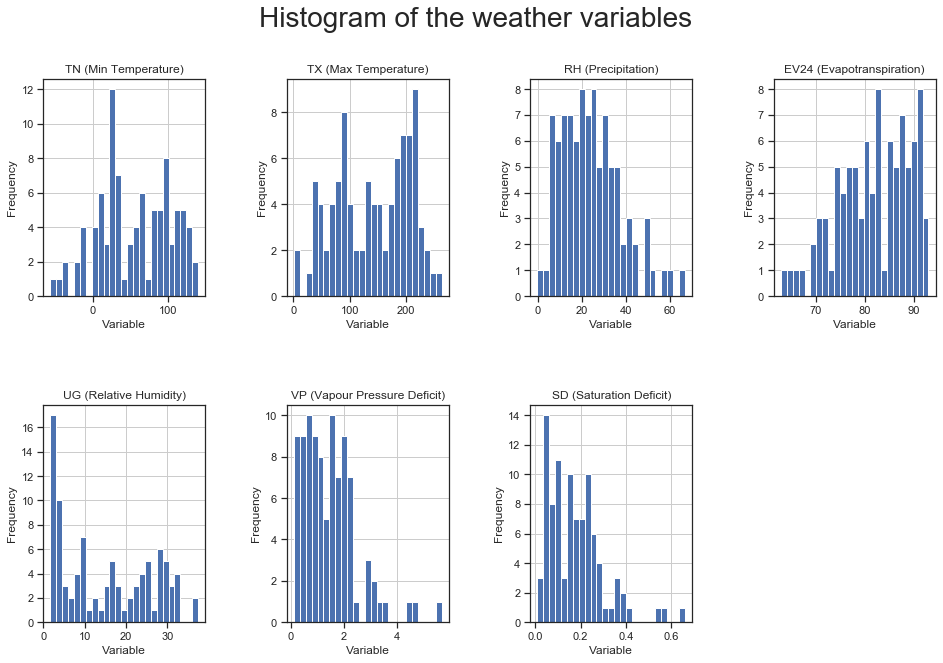

In [32]:
# plotting a histogram per each individual predictor

labels = ["TN (Min Temperature)", "TX (Max Temperature)", "RH (Precipitation)", "EV24 (Evapotranspiration)", "UG (Relative Humidity)", "VP (Vapour Pressure Deficit)", "SD (Saturation Deficit)"]
fig,axs = plt.subplots(nrows = 2, ncols = 4, figsize=(16,10))
plt.suptitle("Histogram of the weather variables", fontsize = 28)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(1, 8):
    # Store in a variable called “curr” the i-th colum
    curr = weather_variables[:,i-1]
    
    # direct to the subplot in order. 
    # index starts at 1 in the upper left corner and increases to the right.
    plt.subplot(2, 4, i)
    
    # plot our individual predictor
    plt.hist(curr, bins = 25)
    
    #set the x and y lables for each subplot
    plt.xlabel('Variable')
    plt.ylabel('Frequency')
    
    # set the grid
    plt.grid()
    
    # set the titile for each subplot
    plt.title(labels[i-1])

# remove the last subpolt since we won't visualize anything on it
plt.subplot(2, 4, 8).remove()
plt.show

C:\Users\Rhea Singh Chib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


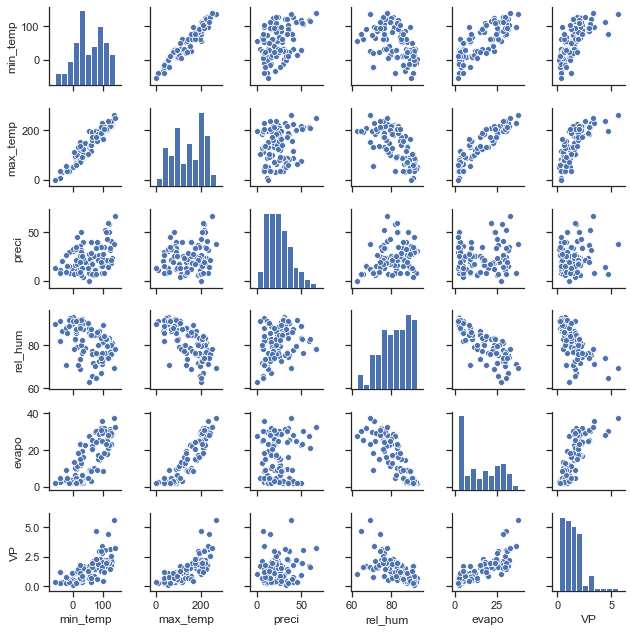

In [20]:
weathers = pd.read_csv(r'H:\ITC\GFM\5 - Spatio-temporal Analytics & Modelling\Group Project\training_data.csv',header=0,  usecols=range(1,8))
sbn.set(style="ticks",color_codes=True)
#to generate pair plots
sbn.pairplot(weathers, size=1.5)

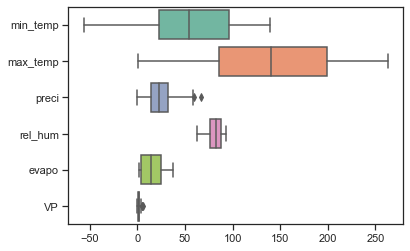

In [13]:
ax = sns.boxplot(data=weathers, orient="h", palette="Set2")